<a href="https://colab.research.google.com/github/Chiragjain2525/Google-Colab-Code/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-a39acdc42cea>:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: abs(x) if isinstance(x, (int, float)) else x)


           count        mean        std        min         25%         50%  \
LB        2126.0  133.340204  11.214379  51.842487  126.000000  133.000000   
AC        2126.0    0.003278   0.004317   0.000000    0.000000    0.001634   
FM        2126.0    0.012656   0.067077   0.000000    0.000000    0.000000   
UC        2126.0    0.004447   0.003265   0.000000    0.001880    0.004505   
DL        2126.0    0.001983   0.003291   0.000000    0.000000    0.000000   
DS        2126.0    0.000011   0.000140   0.000000    0.000000    0.000000   
DP        2126.0    0.000194   0.000831   0.000000    0.000000    0.000000   
ASTV      2126.0   47.292315  18.055799  11.799846   32.000000   49.000000   
MSTV      2126.0    1.383005   1.151614   0.200000    0.700000    1.200000   
ALTV      2126.0   10.555063  21.072324   0.000000    0.000000    0.000000   
MLTV      2126.0    8.515445   7.470464   0.000000    4.696705    7.400000   
Width     2126.0   71.213826  41.341128   3.000000   37.000000  

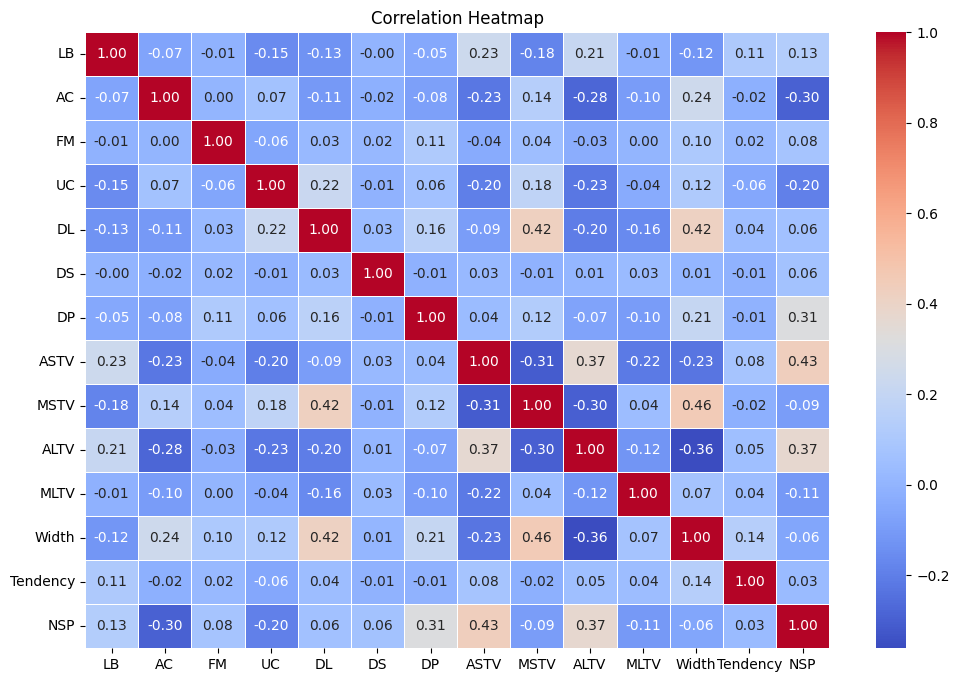

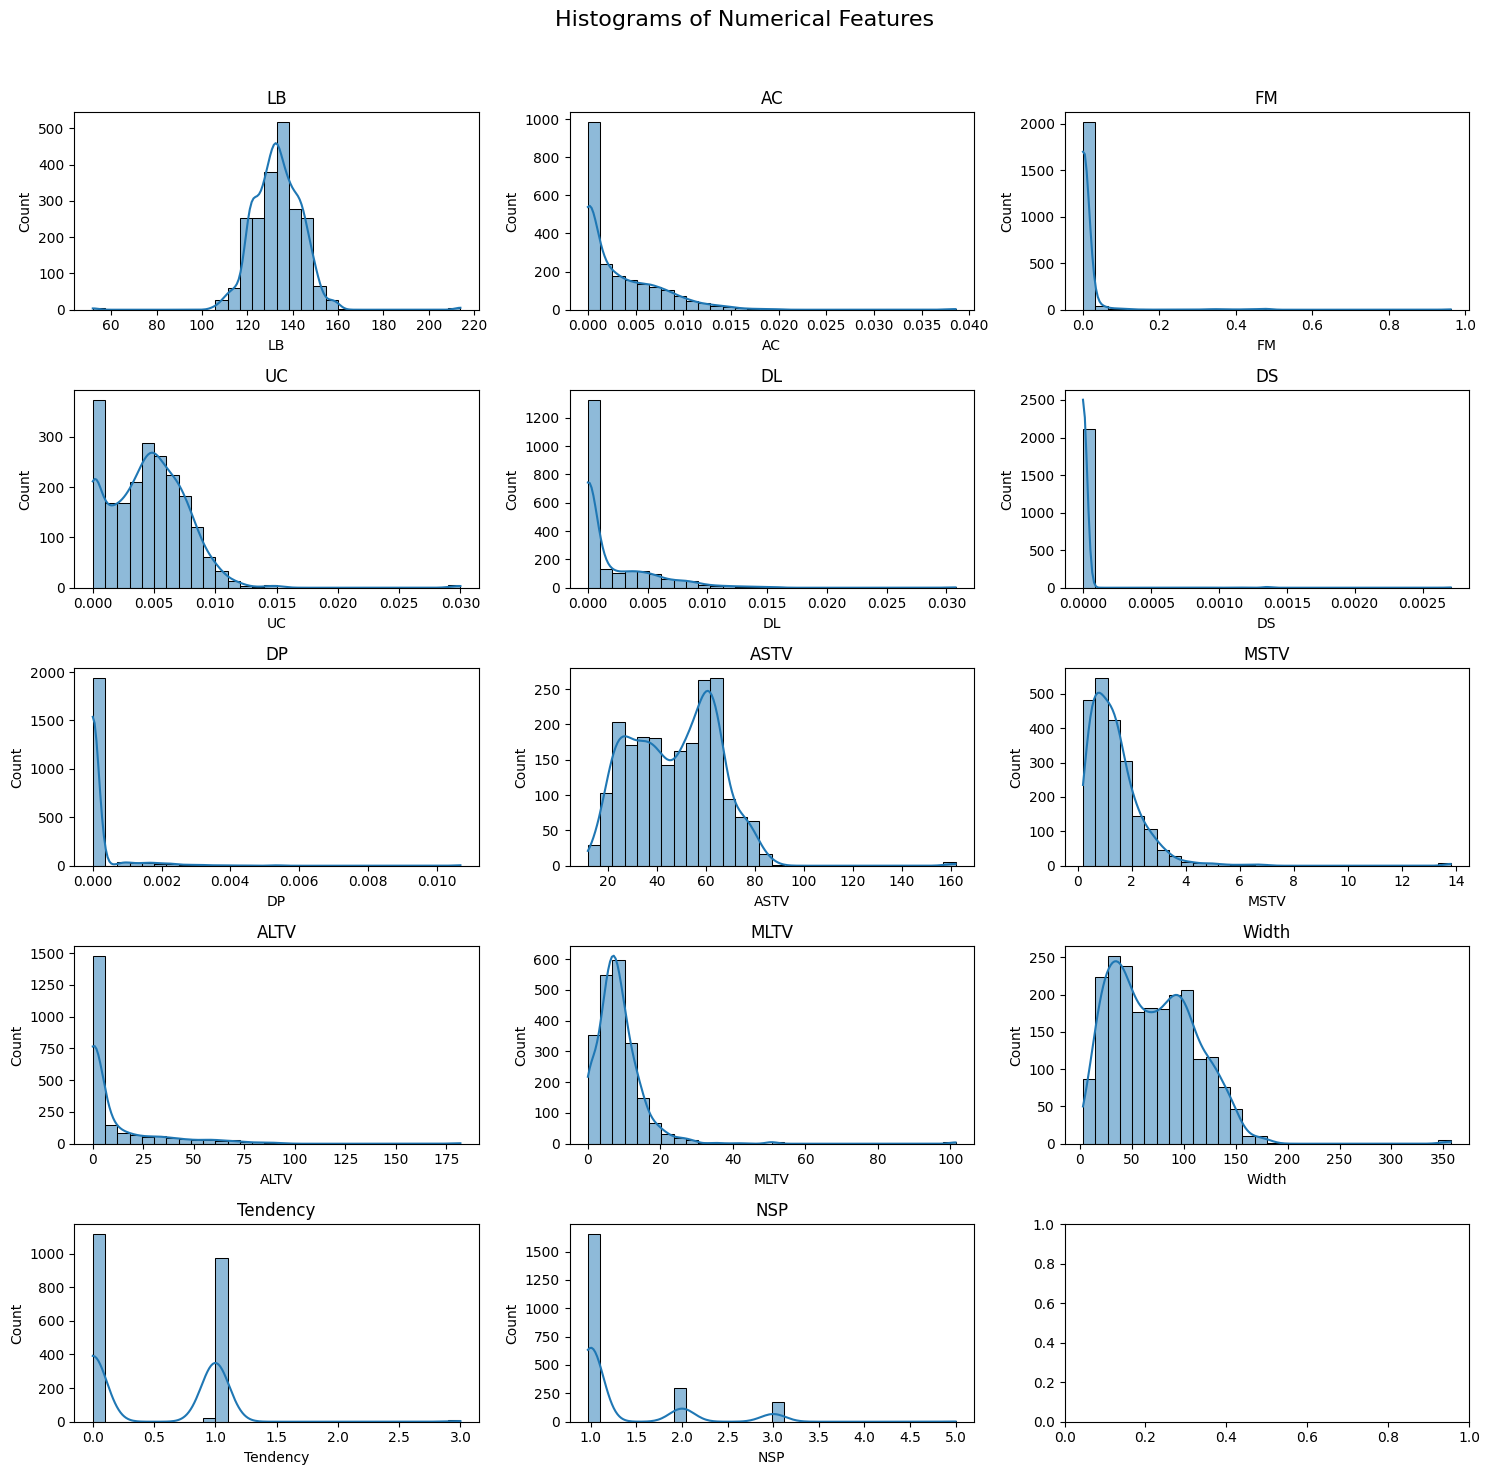

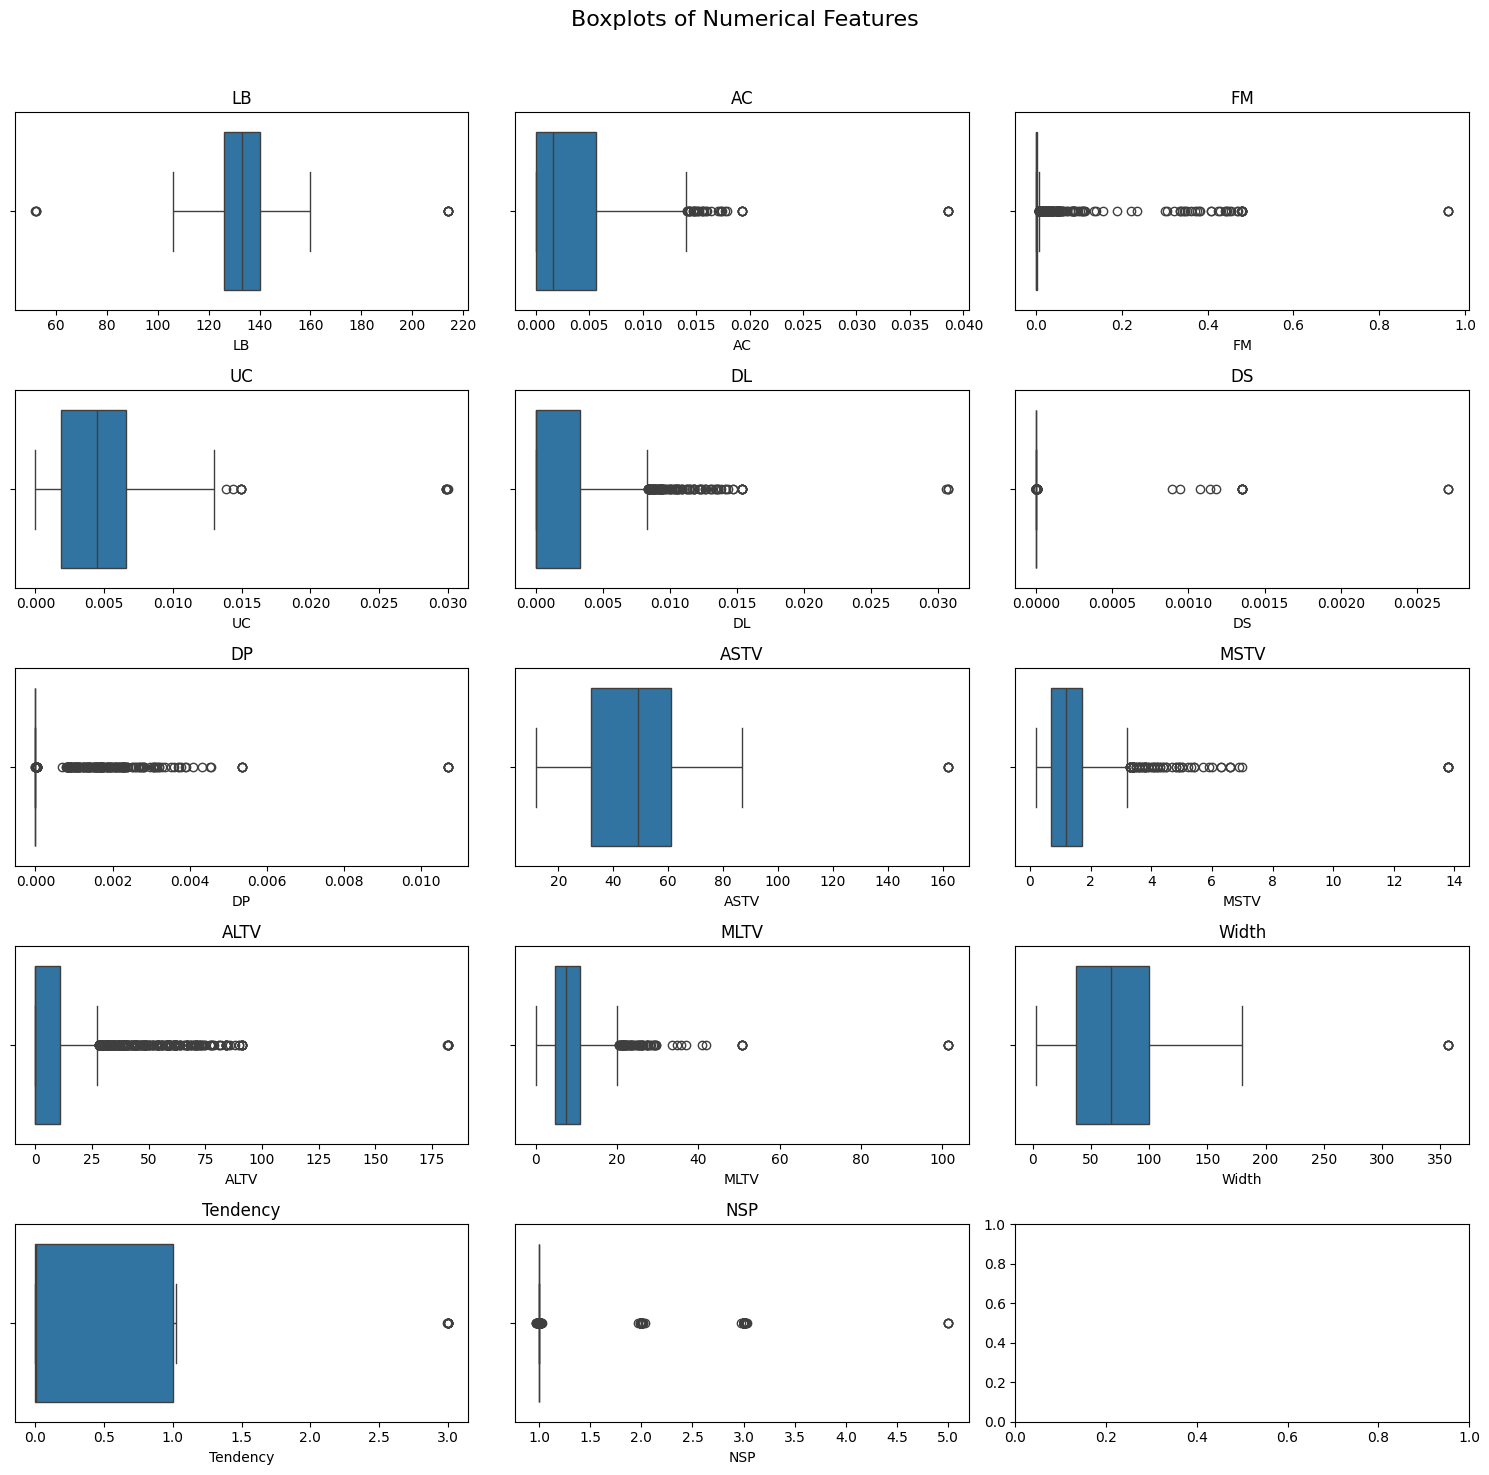

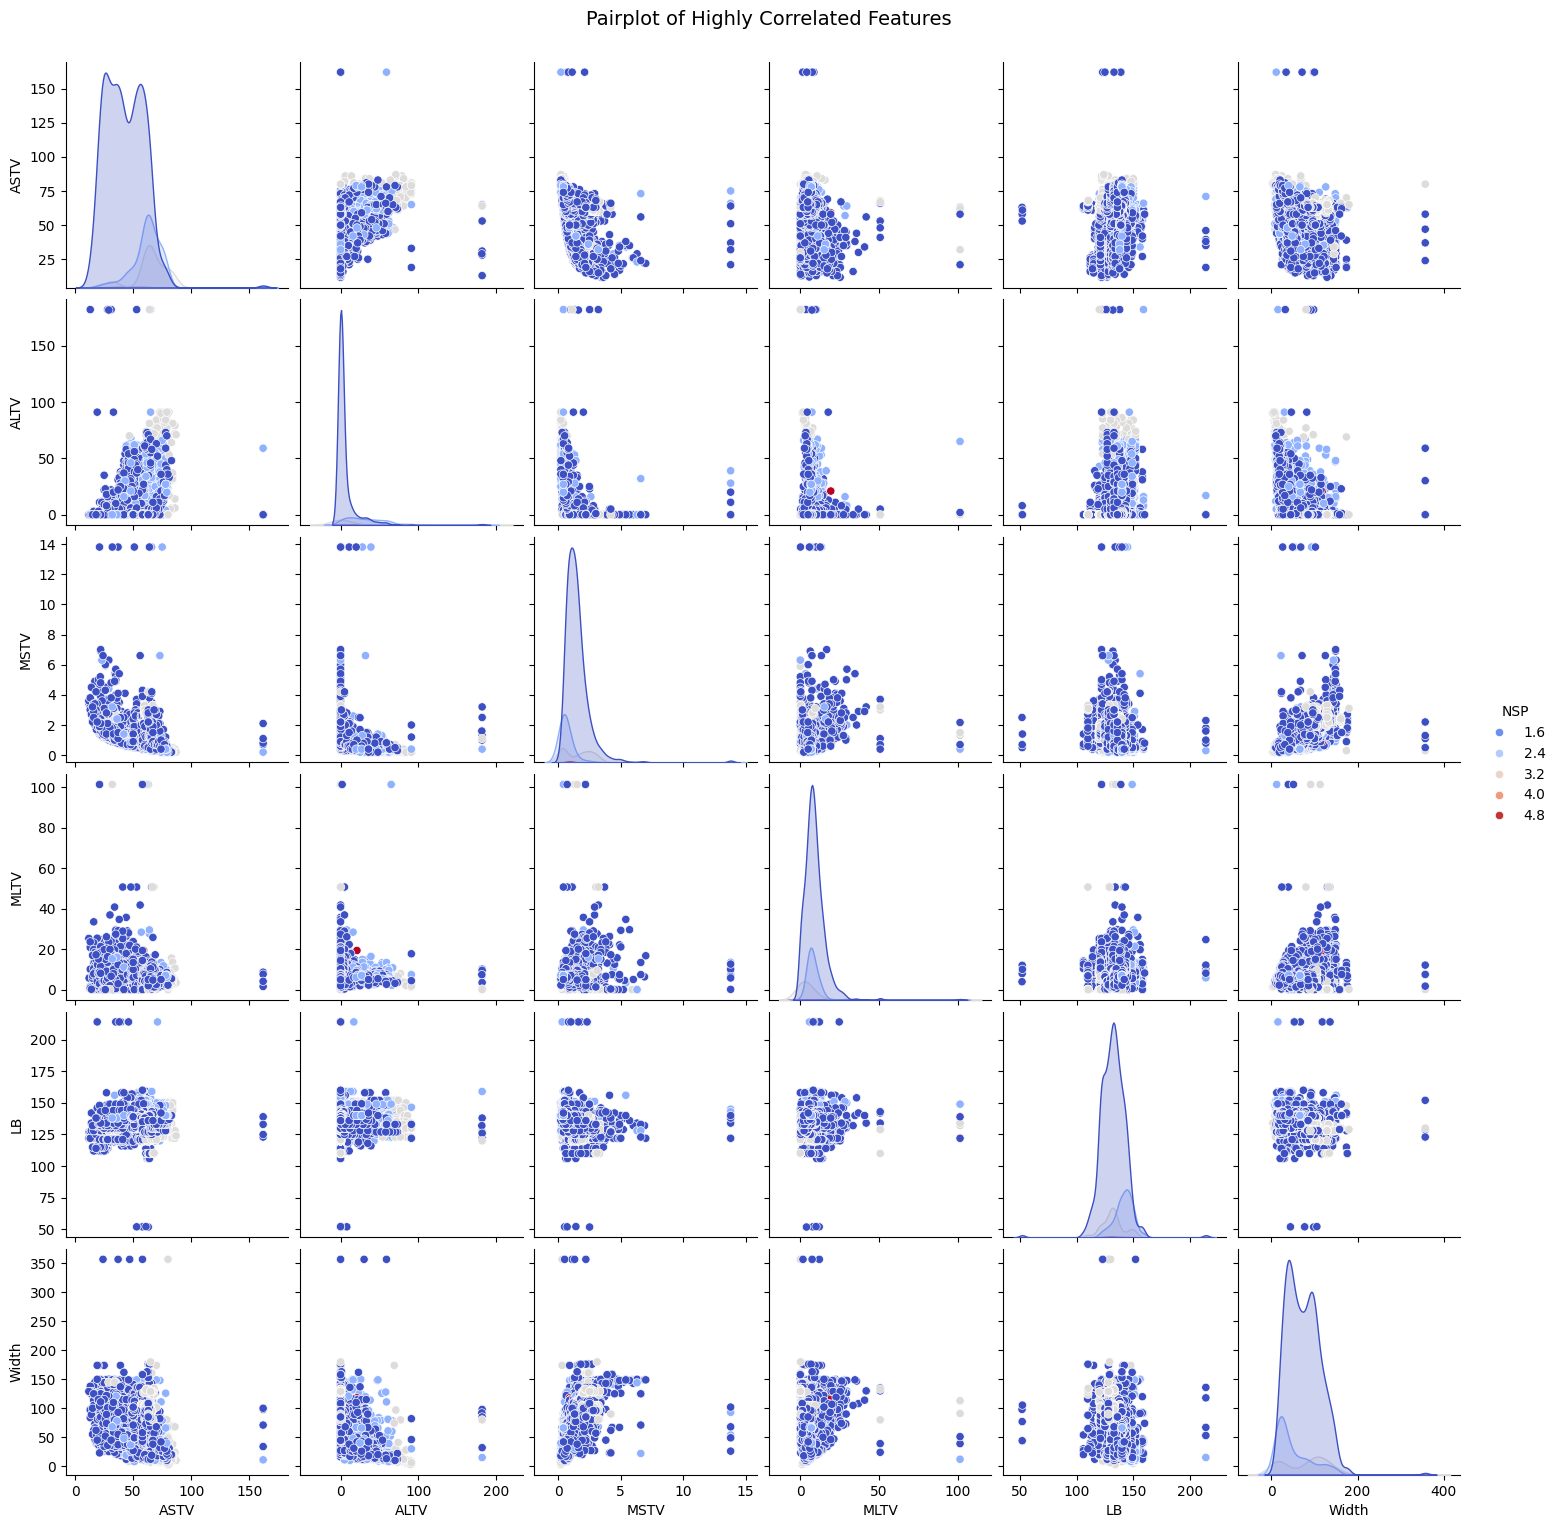

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df=pd.read_csv('Cardiotocographic.csv')
df

# Handling missing values (Impute with median)
df.fillna(df.median(), inplace=True)

# Convert negative values to absolute values
df = df.applymap(lambda x: abs(x) if isinstance(x, (int, float)) else x)

# Statistical Summary
summary_stats = df.describe().T
print(summary_stats)

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Histograms
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))
fig.suptitle("Histograms of Numerical Features", fontsize=16)
for ax, col in zip(axes.flat, df.columns):
    sns.histplot(df[col], bins=30, kde=True, ax=ax)
    ax.set_title(col)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Boxplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))
fig.suptitle("Boxplots of Numerical Features", fontsize=16)
for ax, col in zip(axes.flat, df.columns):
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(col)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Select highly correlated features for pairplot
correlated_features = ["ASTV", "ALTV", "MSTV", "MLTV", "LB", "Width", "NSP"]
sns.pairplot(df[correlated_features], hue="NSP", diag_kind="kde", palette="coolwarm")
plt.suptitle("Pairplot of Highly Correlated Features", y=1.02, fontsize=14)
plt.show()
